## O2 lines

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from classes import Spectra, Observer, HiddenPrints

In [5]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'O2_lines_demo')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower =  710,    
                                upper =  770,   
                                )
#%% 3. add gas_cells and fill with gasses

# cell 0 - H20
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,          # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1
my_spectrum.gas_cells[-1].add_gas(gas_name  = "H2O",    # as in hitran
                                  VMR        = 10E-2)    # E-6 = ppm  | E-2 = %

# cell 1 - O2
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 600,          # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1
my_spectrum.gas_cells[-1].add_gas(gas_name  = "O2",    # as in hitran
                                  VMR        = 21E-2)    # E-6 = ppm  | E-2 = %




#%% 4. download (running hapi functions)
my_spectrum.download(line_list = True,                  # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 1,                      # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                     min_intensity = 1E-24
                    )  


To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Summary of the spectum O2_lines_demo: 
	 lower: 710 [nm] 
	 upper: 770 [nm] 
Gas cell 0: 
	 length: 100 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9, 'self': 0.1} 
	 Gasses (VMR): 
	 	 H2O: 0.1 
Gas cell 1: 
	 length: 600 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.79, 'self': 0.21} 
	 Gasses (VMR): 
	 	 O2: 0.21 



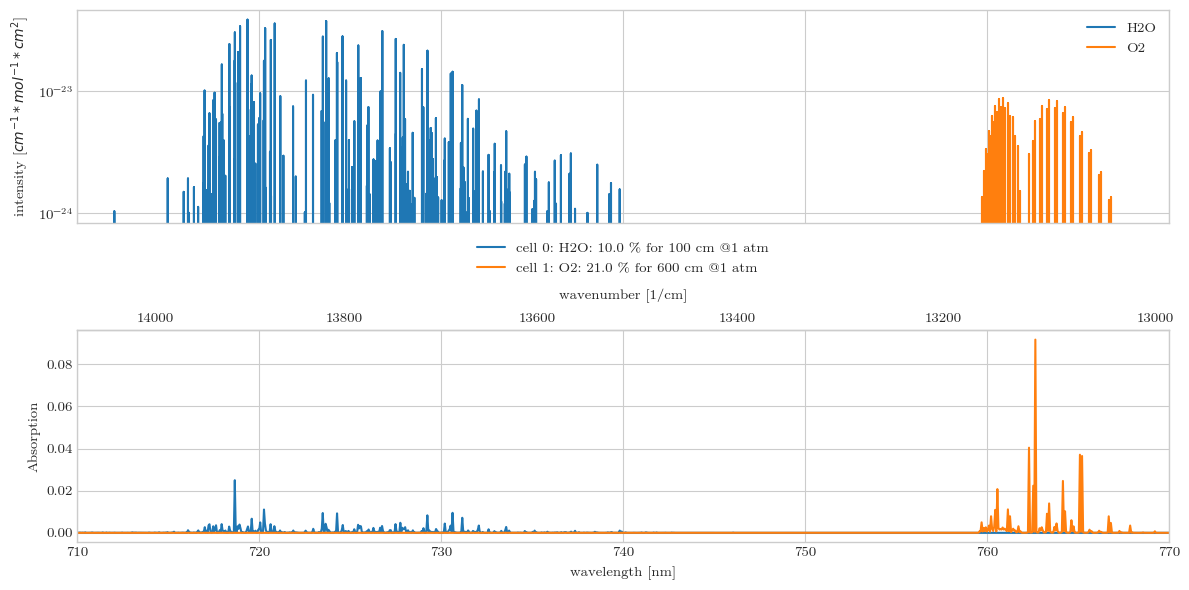

In [6]:
#%% 5. plot
my_spectrum.plot(#figsize = (16,8), # in inches
                 export = True, # saves the plot as pdf and svg
                 absorbance = False,  # set to True to plot Absorbance instead of Absorption
                 fontsize = 10,
                 color = None, # you can set a plot style like 'seaborn-v0_8-whitegrid' or a single color like 'orange' (when only plotting one line)
                 filetype = 'jpg'
                 )

print(my_spectrum)

In [7]:
#%% 6. export
# exports a text file containing the infomration about the spectrum and the gas cells.

my_spectrum.export(directory = 'exports') # default directory is 'exports'

Exported the absorption data to: exports
